In [2]:
!pip install jieba wordcloud
import jieba
import jieba.analyse
import pandas as pd
import numpy
from collections import Counter

     ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/19.2 MB 2.0 MB/s eta 0:00:10
      --------------------------------------- 0.3/19.2 MB 3.2 MB/s eta 0:00:06
     - -------------------------------------- 0.5/19.2 MB 4.3 MB/s eta 0:00:05
     - -------------------------------------- 0.8/19.2 MB 4.6 MB/s eta 0:00:04
     -- ------------------------------------- 1.1/19.2 MB 5.4 MB/s eta 0:00:04
     -- ------------------------------------- 1.1/19.2 MB 5.4 MB/s eta 0:00:04
     -- ------------------------------------- 1.1/19.2 MB 5.4 MB/s eta 0:00:04
     --- ------------------------------------ 1.8/19.2 MB 5.3 MB/s eta 0:00:04
     --- ------------------------------------ 1.9/19.2 MB 5.5 MB/s eta 0:00:04
     ---- ----------------------------------- 2.3/19.2 MB 5.7 MB/s eta 0:00:03
     ----- ---------------------------------- 2.7/19.2 MB 5.9 MB/s eta 0:00:03
     ----- ---------------------------------- 2.8/19.2 MB 5

In [4]:
with open('技職教育文章.txt','r',encoding='utf-8') as file:
    whole_text = file.read()
whole_text

'技職院校高中生的新出路\n\n\n台灣的技職院校在這兩年間正面臨前所未有的量變與質變。\n\n產業結構轉變，對高級勞動力的需求終於反映在職業教育的體制上，技職教育就像一個以往不被重視的瘦弱小孩，突然一下子要長高、長壯，承擔成人的責任。\n\n十年前，台灣技職體系的高等教育只有一所台灣工業技術學院，就是現在台灣科技大學的前身。即使如此，一般人對於這所位在台大旁邊的學校印象模糊，台灣科技大學電機系主任張宏展回憶十幾年前剛回國，要去台灣工業技術學院應徵教職時，計程車司機以為他是要到新竹的工業技術研究院。\n\n\n和普通大學「搶學生」\n\n台灣高等教育與職業教育的分水嶺是在國中畢業時，三○％的學生考上高中，七○％的學生進入五專和高職。三年後，普通高中的學生有六○％以上可以進入大學，原本應該是要投入就業市場的高職和專科生，在社會文憑主義的壓力和經濟轉型後對人才需求提高，只好去擠錄取率不到兩成的技術學院。\n\n兩年以前，台灣工業技術學院還是高職和五專畢業生少數的技職體系升學管道，直到吳京任教育部長時，在廣設高中、大學的政策目標下，讓辦學良好的專科學校改制為技術學院，原有技術學院改名為大學，才為在國中畢業就選擇技職道路的學生找到升學的出路，也被稱為除了大學聯招以外的「第二條國道」。\n\n所以，短短的兩年間，技術學院改名為科技大學、專科學校改制成為技術學院附設專科部、普通大學附設二年制技職教育的學校數目都不斷增加，不少專科正在申請改制當中，預計到了西元兩千年，台灣技職院校的數目會超過五十所。\n\n「以前，台灣走勞力密集的經濟型態，高職畢業就可以投入就業市場，現在時代變了，大家都走升學的路，」台北科技大學電機系主任王振興說，原本就業導向的職業教育變成升學導向也是可以理解的。\n\n技職院校的增加除了提供高職、專科學生升學管道，高中生同時也是技職院校搶人的目標。去年七月，教育部法規會通過「技術職業院校法」草案，開放四年制科技大學、技術學院（一般簡稱「四技」）和二年制專科學校（一般簡稱「二專」）招收高中畢業生，以實務教學的特色和普通大學「搶學生」。\n\n目前，普通高中畢業生在畢業一年後可以參加二技四技聯招，報考技職學校。其次，透過多元入學管道，應屆畢業生也能以申請入學的方式就讀科技大學和技術學院的四技。以八十八學年度為例，有十所技職院校參加申請入學，總共招收五百四十八個名額

In [21]:
import re
import string
cleaned_text = re.sub(r'[。|：|「|（|）|，|\n|\r|！|～| 、」]+'.format(re.escape(string.punctuation)), '', whole_text)
cleaned_text = re.sub(r'的|也|在|使用|與|和|之|及|等|於|組|有|為|是|可以|可|以|院|校', '', cleaned_text)

In [22]:
seg_list = jieba.cut(cleaned_text, cut_all=False)
segment_text = ' '.join(seg_list)
segment_text

'技職 高中生 新出路 台灣 技職 這兩年 間 正面 臨前 所 未量 變質 變產業 結構 轉變 對 高級 勞動力 需求 終 反映 職業 教育 體制 上 技職 教育 就 像 一個 往 不 被 重視 瘦弱 小孩 突然 一下子 要長 高長 壯承擔 成人 責任 十年 前台 灣技 職體 系高 教育 只 一所 台灣 工業 技術學 就 現台灣 科技 大學 前身 即使如此 一般 人 對 這所位 台大 旁邊學 印象 模糊 台灣 科技 大學 電機 系主任 張宏展 回憶十幾 年前 剛回 國要 去 台灣 工業 技術 學應 徵教 職時 計程車 司機 他 要 到 新竹 工業 技術 研究 普通 大學 搶學生 台灣 高 教育 職業 教育 分水 嶺國 中 畢業 時 三 ○ ％ 學生 考上 高中 七 ○ ％ 學生 進入 五 專高職 三年 後 普通高中 學生 六 ○ ％ 上 進入 大學 原本 應該 要 投入 就業 市場 高職 專科生 社會文 憑 主義壓力 經濟 轉型 後 對 人才需求 提高 只好 去 擠錄 取率 不到 兩成 技術學 兩年 前台 灣工業 技術學 還高 職五專 畢業 生少 數技 職體 系升學 管道 直到 吳京任 教育部 長 時廣設 高中 大學 政策 目標 下 讓 辦學 良好 專科學 改制 技術 學原 技術學 改名 大學 才 國中 畢業 就 選擇 技職 道路 學生 找到 升學 出路 被 稱 除了 大學聯 招外 第二 條國道 所 短短 兩年間 技術學 改名 科技 大學 專科學 改制 成技術學 附設 專科部 普通 大學 附設 二年制 技職 教育 學數目 都 不斷 增加 不少 專科正 申請 改制 當中 預計 到 了 西元 兩 千年 台灣技 職數 目會 超過 五十 所 前台 灣走 勞力 密集 經濟型 態高職 畢業 就 投入 就業 市場 現時代變 了 大家 都 走 升學路 台北 科技 大學 電機 系主任 王振興 說 原本 就業導 向 職業 教育 變成 升學導 向 理解 技職 增加 除了 提供 高職 專科學 生升學 管道 高中生 同時 技職 搶 人 目標 去年 七月 教育部 法規會 通過 技術 職業法 草案 開放 四年制 科技 大學 技術學 一般 簡稱 四技 二年制 專科學 一般 簡稱 二專 招收 高中 畢業生 實務 教學 特色 普通 大學 搶學生 目前 普通高中 畢業生 畢業 一年 後 參加二技 四技聯

In [23]:
word_freq = Counter(seg_list)

In [24]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [27]:
mask = numpy.array(Image.open("unhappy.jpg"))
font = 'C:\Windows\Fonts\MSJH.TTC'

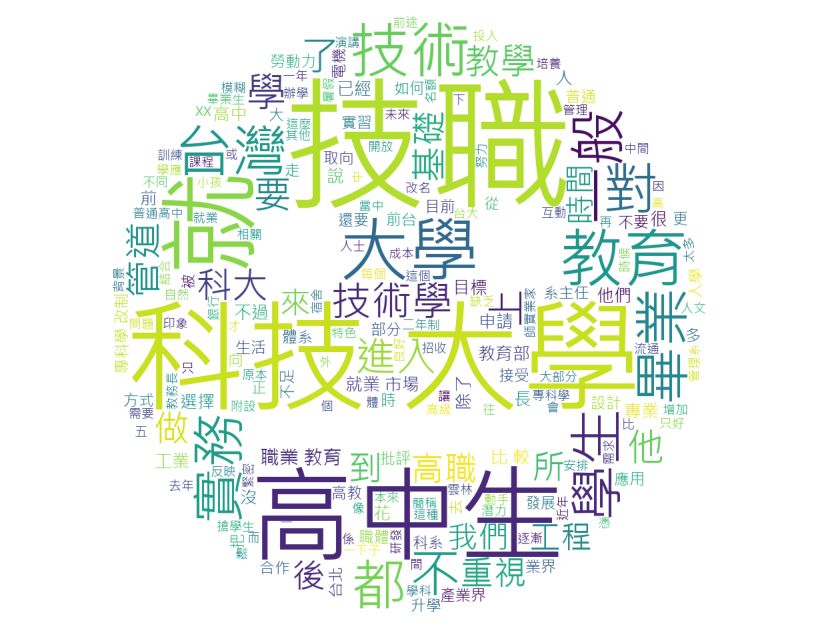

In [28]:
wordcloud = WordCloud(background_color="white", font_path=font, mask = mask)

# 生成词云
wordcloud.generate(segment_text)

# 可以使用 matplotlib 显示词云图
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# 显示词云图
plt.show()